# WordCloud를 활용한 리뷰 시각화

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [3]:
# pip install wordcloud

In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [5]:
df = pd.read_csv("./data/googleplaystore_data/googleplaystore_user_reviews.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [7]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


- 26,868 개의 NaN 값이 있는 것으로 확인됨

In [8]:
# NaN 값 있는 열 제거
df= df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [10]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


- 최종 데이터 개수는 37,427개

In [11]:
# Translated_Review 컬럼의 모든 값을 리스트로 묶음
text = df.Translated_Review.tolist()

In [12]:
# text

In [13]:
# 리스트의 element들을 공백을 이용해서 구분
text = ' '.join(text)

In [14]:
# 모두 소문자로 바꾸기
text = text.lower()

## 1. 1차 시각화

In [15]:
wordcloud = WordCloud(collocations=True,
                      background_color="white",
                      max_words = 150,
                      width = 1000,
                      height = 800,
                      min_word_length = 4).generate(text) # 4글자 이상만 출력

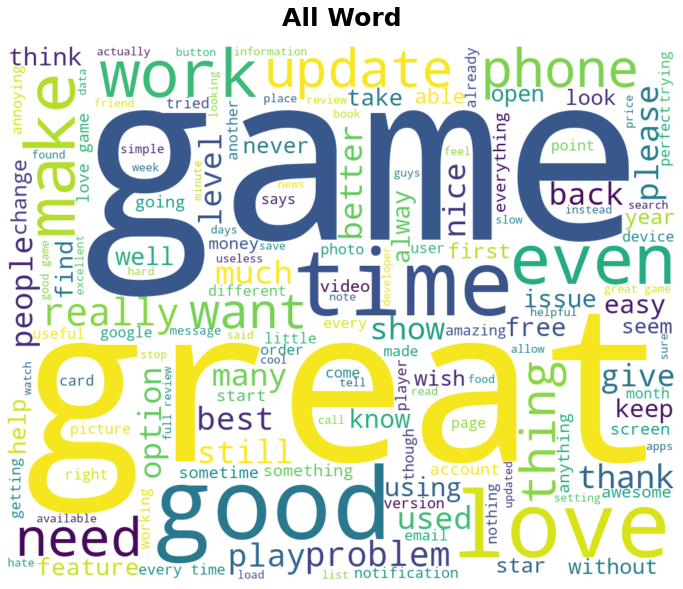

In [16]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}
plt.title('All Word', fontdict=title_font, pad=20)

plt.show()

### 해석이 큰 도움이 안 되는 동사, 형용사, 부사 등은 제외하고 명사만 볼 필요가 있다.

## 2. 2차 시각화 - 명사만 출력

In [17]:
# 명사만 출력하기 위해 nltk 라이브러리 다운로드

# pip install nltk

In [18]:
import nltk

In [19]:
# nltk.download()
# 실행하면 창이 하나 뜬다. 거기서 다운로드

In [20]:
from nltk.corpus import brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [21]:
tokens = nltk.word_tokenize(text)
tags = nltk.pos_tag(tokens)
nouns = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]

In [22]:
# 새롭게 만든 명사 텍스트들이 다시 리스트 형태로 묶였으므로 전체를 다시 string로 바꿔줌
nouns = ' '.join(nouns)

In [23]:
wordcloud = WordCloud(collocations=True,
                      background_color="white",
                      max_words = 150,
                      width = 1000,
                      height = 800,
                      min_word_length = 3).generate(nouns)

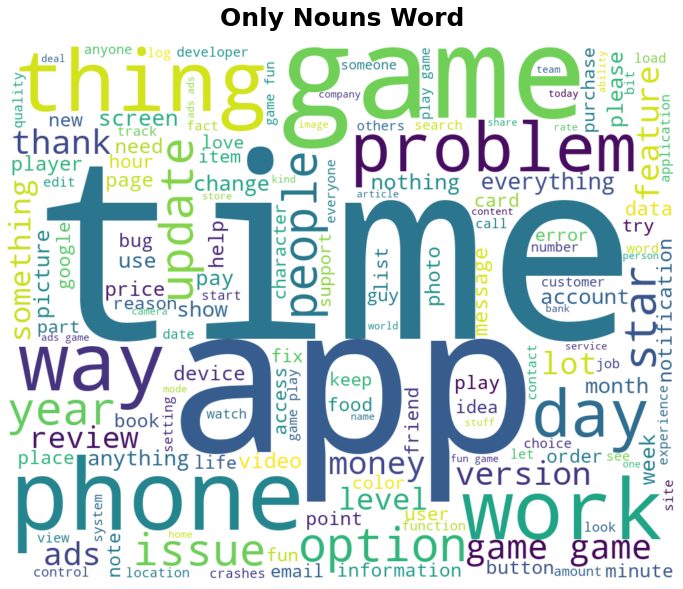

In [24]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}
plt.title('Only Nouns Word', fontdict=title_font, pad=20)

plt.show()

### time, app, game, phone 등의 단어가 부각된다.
### 이 중 몇몇 단어들은 app 특성상 당연하게 많이 표현되는 것들이므로 수동으로 필터링 할 필요가 있다. 

## 3. 3차 시각화 - 수동으로 불필요한 단어 제거

In [25]:
STOPWORDS = ["app", "thing", "phone", "way", "problem", "game"]


wordcloud = WordCloud(stopwords = STOPWORDS, 
                      collocations=True,
                      background_color="white",
                      max_words = 150,
                      width = 1000,
                      height = 800,
                      min_word_length = 3).generate(nouns)

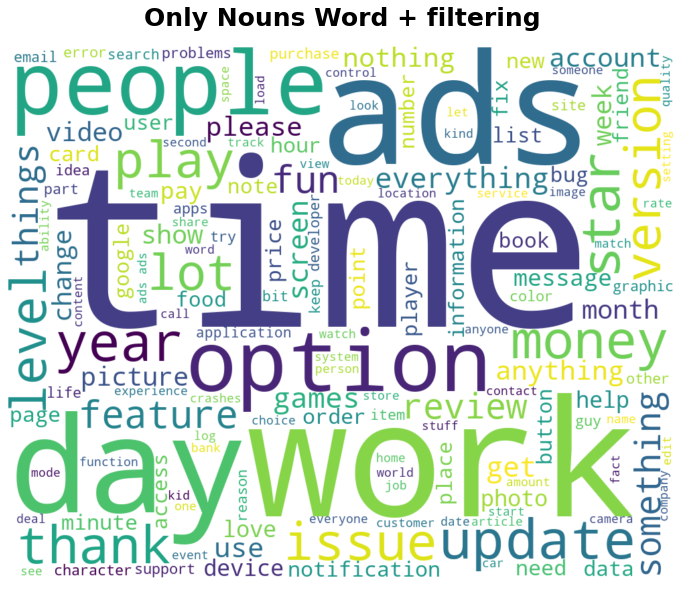

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}
plt.title('Only Nouns Word + filtering', fontdict=title_font, pad=20)

plt.show()

### 필터링 결과 time, work, ads, day, option, people, update 등의 단어가 부각된다.

## 4. 긍정/부정 따로 보기

In [27]:
df['Sentiment'].describe()

count        37427
unique           3
top       Positive
freq         23998
Name: Sentiment, dtype: object

Text(0.5, 1.0, 'Sentiment')

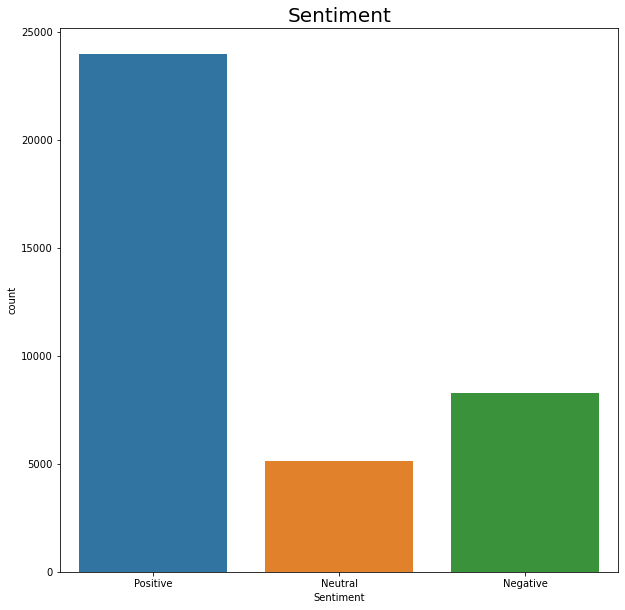

In [28]:
fig, ax = plt.subplots(figsize = (10, 10)) 
sns.countplot(x='Sentiment', data=df)
# plt.xticks(rotation=90)|
plt.title('Sentiment', size=20)

## 5. 긍정(Positive) 리뷰만 보기

In [30]:
positive = df['Sentiment']=="Positive"
df_p = df[positive]
df_p

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


In [31]:
23998 / 37427 * 100

64.11948593261549

- 약 64% 가 긍정적인 리뷰인 것으로 확인됨

In [32]:
text_p = df_p.Translated_Review.tolist()

In [33]:
text_p = ' '.join(text_p).lower()

In [34]:
tokens_p = nltk.word_tokenize(text_p)
tags_p = nltk.pos_tag(tokens_p)
nouns_p = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]

In [35]:
nouns_p = ' '.join(nouns_p)

In [36]:
STOPWORDS = ["app", "thing", "phone", "way", "problem", "game"]

wordcloud_p = WordCloud(stopwords = STOPWORDS,
                        collocations = True,
                        background_color = "white",
                        max_words = 150,
                        width = 1000,
                        height = 800,
                        min_word_length = 3).generate(nouns_p)

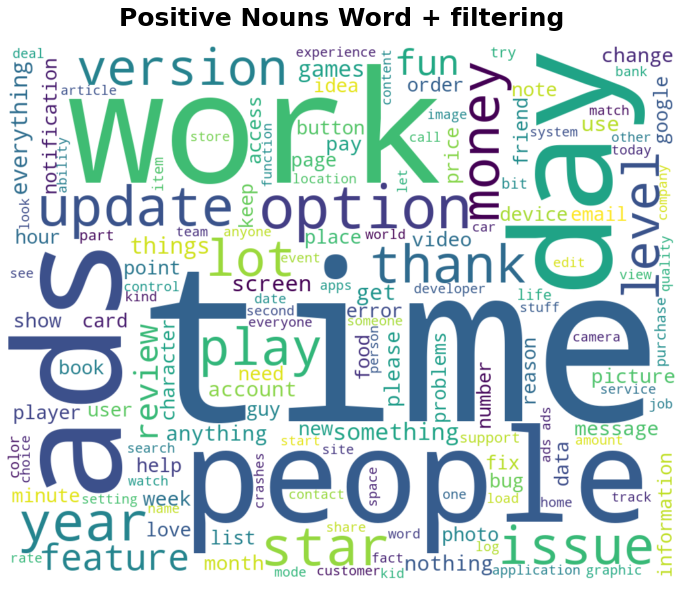

In [37]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud_p, interpolation='bilInear')
plt.axis('off')

title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}
plt.title('Positive Nouns Word + filtering', fontdict=title_font, pad=20)

plt.show()

### 전체 리뷰를 시각화한 것과 거의 차이가 없다.

## 6. 긍정리뷰 중 Sentiment_Polarity가 큰 것만 보기

In [45]:
df_p['Sentiment_Polarity'].describe()

count    2.399800e+04
mean     3.724021e-01
std      2.526559e-01
min      5.551115e-18
25%      1.666667e-01
50%      3.300000e-01
75%      5.000000e-01
max      1.000000e+00
Name: Sentiment_Polarity, dtype: float64

평균 Sentiment_Polarity 는 약 0.37이므로, 이보다 큰 데이터로만 필터링한다

In [49]:
positive_sp = df_p['Sentiment_Polarity'] > 0.37
df_p_sp = df_p[positive_sp]
df_p_sp

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
...,...,...,...,...,...
64190,Hotwire Hotel & Car Rental App,Find good price car rental.,Positive,0.700000,0.600000
64192,Hotwire Hotel & Car Rental App,Great deals,Positive,0.800000,0.750000
64207,Housing-Real Estate & Property,Good,Positive,0.700000,0.600000
64209,Housing-Real Estate & Property,Awesome app.. But prices date? Awesome app. Gi...,Positive,0.509375,0.511458


In [50]:
text_p_sp = df_p_sp.Translated_Review.tolist()

In [51]:
text_p_sp = ' '.join(text_p_sp).lower()

In [52]:
tokens_p_sp = nltk.word_tokenize(text_p_sp)
tags_p_sp = nltk.pos_tag(tokens_p_sp)
nouns_p_sp = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]

In [53]:
nouns_p_sp = ' '.join(nouns_p_sp)

In [56]:
STOPWORDS = ["app", "thing", "phone", "way", "problem", "game"]

wordcloud_p_sp = WordCloud(stopwords = STOPWORDS,
                        collocations = True,
                        background_color = "white",
                        max_words = 100,
                        width = 1000,
                        height = 800,
                        min_word_length = 3).generate(nouns_p_sp)

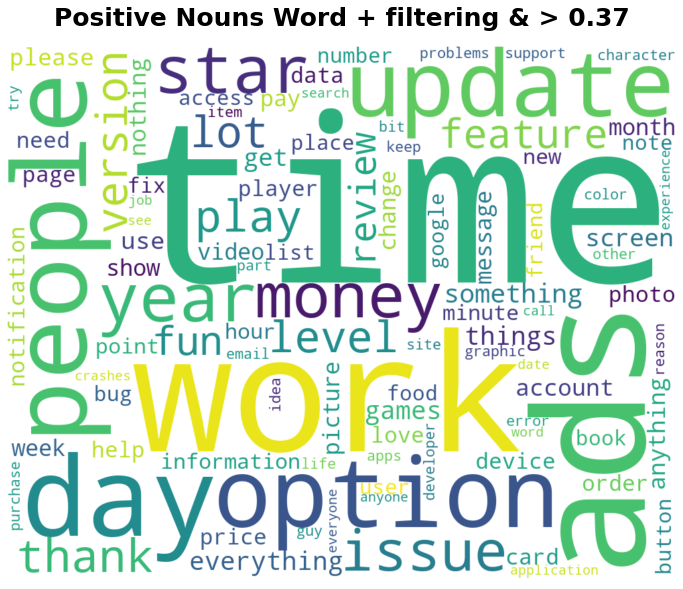

In [57]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud_p_sp, interpolation='bilInear')
plt.axis('off')

title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}
plt.title('Positive Nouns Word + filtering & > 0.37', fontdict=title_font, pad=20)

plt.show()

## 7. 부정(Negative) 리뷰만 보기

In [60]:
negative = df['Sentiment']=="Negative"
df_n = df[negative]
df_n

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


In [61]:
8271 / 37427 * 100

22.099019424479653

- 약 22% 가 부정적인 리뷰인 것으로 확인됨.
- 나머지 11%는 중립적인 리뷰

In [62]:
text_n = df_n.Translated_Review.tolist()

In [63]:
text_n = ' '.join(text_n).lower()

In [64]:
tokens_n = nltk.word_tokenize(text_n)
tags_n = nltk.pos_tag(tokens_n)
nouns_n = [word for word,pos in tags_n if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]

In [65]:
nouns_n = ' '.join(nouns_n)

In [66]:
STOPWORDS = ["app", "thing", "phone", "way", "problem", "game"]

wordcloud_n = WordCloud(stopwords = STOPWORDS,
                        collocations = True,
                        background_color = "white",
                        max_words = 150,
                        width = 1000,
                        height = 800,
                        min_word_length = 3).generate(nouns_n)

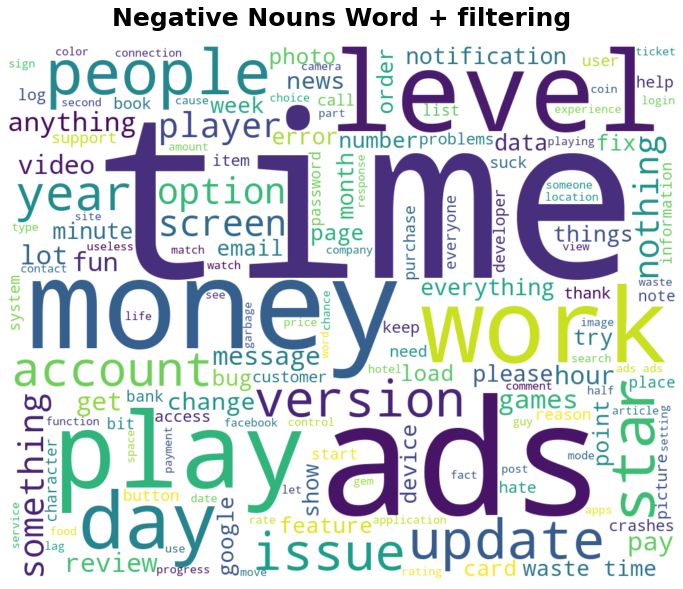

In [67]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud_n, interpolation='bilInear')
plt.axis('off')

title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}
plt.title('Negative Nouns Word + filtering', fontdict=title_font, pad=20)
plt.show()

### 긍정적인 리뷰와는 다르게 level, money가 부각되었다.

## 8. 부정리뷰 중 Sentiment_Polarity가 낮은 것만 보기

In [68]:
df_n['Sentiment_Polarity'].describe()

count    8.271000e+03
mean    -2.561728e-01
std      2.354828e-01
min     -1.000000e+00
25%     -3.645833e-01
50%     -1.833333e-01
75%     -8.125000e-02
max     -2.523234e-18
Name: Sentiment_Polarity, dtype: float64

평균 Sentiment_Polarity 는 약 -0.256이므로, 이보다 낮은 데이터로만 필터링한다

In [72]:
negative_sp = df_n['Sentiment_Polarity'] < -0.256
df_n_sp = df_n[negative_sp]
df_n_sp

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
132,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
185,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


In [73]:
text_n_sp = df_n_sp.Translated_Review.tolist()

In [74]:
text_n_sp = ' '.join(text_n_sp).lower()

In [75]:
tokens_n_sp = nltk.word_tokenize(text_n_sp)
tags_n_sp = nltk.pos_tag(tokens_n_sp)
nouns_n_sp = [word for word,pos in tags_n if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]

In [76]:
nouns_n_sp = ' '.join(nouns_n_sp)

In [77]:
STOPWORDS = ["app", "thing", "phone", "way", "problem", "game"]

wordcloud_n_sp = WordCloud(stopwords = STOPWORDS,
                        collocations = True,
                        background_color = "white",
                        max_words = 100,
                        width = 1000,
                        height = 800,
                        min_word_length = 3).generate(nouns_n_sp)

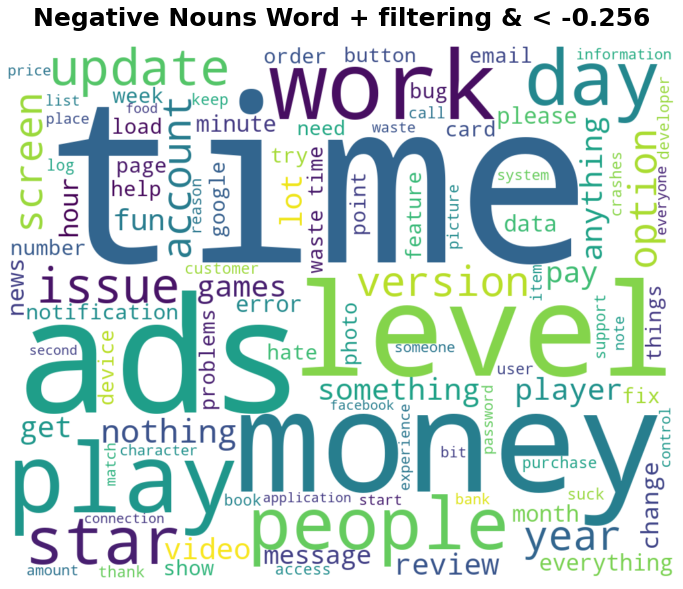

In [78]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud_n_sp, interpolation='bilInear')
plt.axis('off')

title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}
plt.title('Negative Nouns Word + filtering & < -0.256', fontdict=title_font, pad=20)
plt.show()